<a href="https://colab.research.google.com/github/Wolframettes/Noise/blob/master/Gabor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math as m

In [256]:
from celluloid import Camera

In [254]:
!pip install celluloid

# implement Gabor noise 

In [2]:
def generate_lattice(n,p):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if np.random.uniform() < p:
                lattice[i,j]=1
    return lattice

def generate_lattice_random(n,p):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            lattice[i,j]=np.random.randint(0,10)
    return lattice

def generate_lattice_uniform(n,p):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            lattice[i,j]=p
    return lattice

1024

In [197]:
lattice1 =  generate_lattice(1000,0.4)
lattice2 =  generate_lattice_random(1000,0.4)
lattice3 =  generate_lattice_uniform(1000,10)



In [198]:

lattice4 =  generate_lattice(100,0.4)
lattice5 =  generate_lattice_random(100,0.4)
lattice6 =  generate_lattice_uniform(100,10)

<function matplotlib.pyplot.show(*args, **kw)>

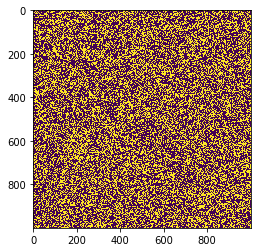

In [ ]:
plt.imshow(lattice1, interpolation="nearest")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

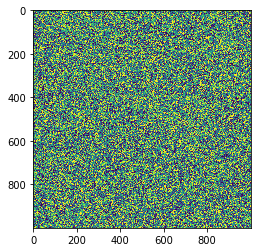

In [ ]:
plt.imshow(lattice2, interpolation="nearest")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

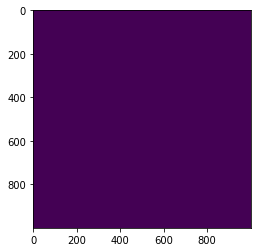

In [ ]:
plt.imshow(lattice3, interpolation="nearest")
plt.show

#Gabor kernel:

##$g(x,y)= K e^{-\pi a^2 (x^2 + y^2)} \cos(2 \pi F_0 (x cos \omega_0 + y sin \omega_0))$

da wiki! conjunto de Gabor filters

$G_c[i,j] = B e^{-\frac{(i^2+j^2)}{2\sigma^2}} \cos(2\pi f(i\cos\theta+j\sin\theta))$



In [218]:
def gaborkernel(x,y,K,a,F0,w0):
    #print()
    return K*m.exp(-m.pi*(a**2)*(x**2+y**2))*m.cos(2*m.pi*F0*(x*m.cos(w0)+y*m.sin(w0)))

def gaborize(lattice,K,a,F0,w0):   

    redegabor = np.zeros((np.shape(lattice)[0],np.shape(lattice)[1]), dtype='float')
    for i in range(1,np.shape(redegabor)[0]):
        #print(i)
        for j in range(1,np.shape(redegabor)[1]):
            redegabor[i][j]= gaborkernel(i,j,K,a,F0,w0)
    return redegabor


def randomgaborize(lattice,K,a,F0,w0,convmax):   

    redegabor=np.zeros((np.shape(lattice)[0],np.shape(lattice)[1]), dtype='float')
    for i in range(1,np.shape(redegabor)[0]):
        print(i)
        for j in range(1,np.shape(redegabor)[1]):
            randomx = np.random.randint(0,np.shape(lattice)[0],convmax)
            randomy = np.random.randint(0,np.shape(lattice)[1],convmax)
            fim=0.0
            for k in range(0,convmax): 
                fim = fim + gaborkernel(i-randomx[k],j-randomy[k],K,a,F0,w0) 
            redegabor[i][j]= fim

    return redegabor

def convgaborize(lattice,K,a,F0,w0,convmax):   

    redegabor=np.zeros((np.shape(lattice)[0],np.shape(lattice)[1]), dtype='float')
    for i in range(1,np.shape(redegabor)[0]):
        print(i)
        for j in range(1,np.shape(redegabor)[1]):
            randomx = np.random.randint(0,np.shape(lattice)[0],convmax)
            randomy = np.random.randint(0,np.shape(lattice)[1],convmax)
            fim=0.0
            for k in range(0,convmax): 
                fim = fim + gaborkernel(i-randomx[k],j-randomy[k],K,a,F0,w0) 
            redegabor[i][j]= fim

    return redegabor

In [200]:
from scipy.signal import convolve

da Wiki

In [40]:
(y,x)=np.meshgrid(np.arange(1, 4 + 1), np.arange(1, 4 + 1))
y

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [202]:
def gabor(sigma, theta, Lambda, psi, gamma):
    """Gabor feature extraction."""
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 3  # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb

In [163]:
gaborkernel(1,3,2,2,5,6)

-1.5440742347958607

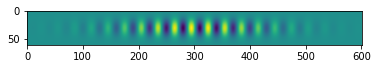

In [34]:
#gabor(sigma, theta, Lambda, psi, gamma):
#gaborize(lattice,K,a,F0,w0)
plt.imshow(gabor(100,3.14/2,30,20,10))

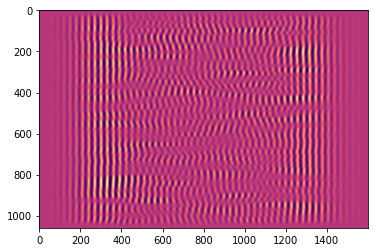

In [233]:
plt.imshow(convolve(lattice1,gabor(100,3.14/2,30,20,10)), cmap='magma')

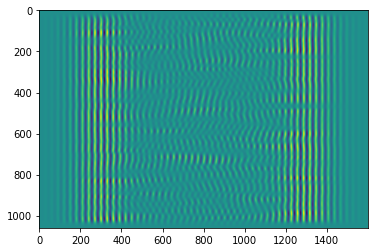

In [169]:
plt.imshow(convolve(lattice2,gabor(100,3.14/2,30,20,10)))

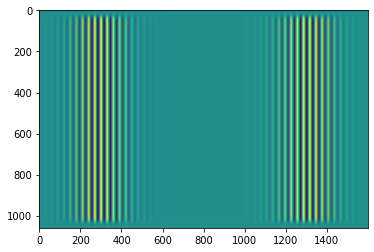

In [170]:
plt.imshow(convolve(lattice3,gabor(100,3.14/2,30,20,10)))

In [87]:
gtry = gabor(100,3.14/2,30,20,10)

In [99]:
sera = gaborize(lattice3,100,20,10,10)

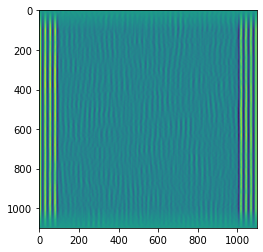

In [213]:
plt.imshow(convolve( gaborize(lattice6,100,2,5,0.008),lattice2))

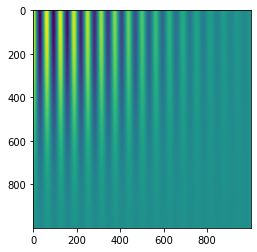

In [232]:
plt.imshow(gaborize(lattice1,1000,0.001,2,0.008))

In [207]:
gaborize(lattice1,100,2,5,0.8)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.09938680e-09, -2.84278055e-26, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -4.86549306e-26,  1.38773094e-42, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00]])

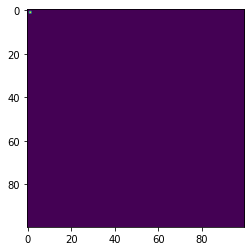

In [192]:
plt.imshow(gaborize(lattice6,100,2,5,0.8))

$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$

where

$x' = x \cos\theta + y \sin\theta\ $

and

$y' = -x \sin\theta + y \cos\theta\$

In [264]:
lambdaf

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 29, 28, 27, 26, 25,
       24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,
        7,  6,  5,  4,  3,  2,  1])

In [268]:
lambdaa = np.arange(0.1,30,0.1)
lambdab = np.flip(lambdaa)
lambdaf = np.concatenate((lambdaa,lambdab),axis=0)

In [261]:
float(lambdaf[1])

1.0

In [265]:
lista = []

for f in lambdaf:

    a = convolve(lattice1,gabor(100,3.14/2,float(f),20,10),mode='same')
    lista.append(a)

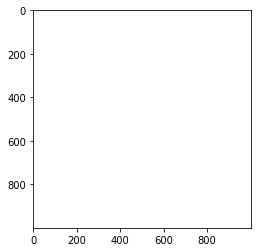

In [269]:
#gabor(sigma, theta, Lambda, psi, gamma)

fig = plt.figure()
camera = Camera(fig)
for f in lambdaf:

    plt.imshow(convolve(lattice1,gabor(100,3.14/2,float(f),20,10),mode='same'), cmap='magma')
    camera.snap()
animation = camera.animate()
animation.save('lambda.gif', writer = 'pillow')

In [270]:
from google.colab import files
files.download( "lambda.gif" )    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
lattice3

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]])

In [ ]:
lambdaa = np.arange(0.1,30,0.1)
lambdab = np.flip(lambdaa)
lambdaf = np.concatenate((lambdaa,lambdab),axis=0)

In [ ]:
fig = plt.figure()
camera = Camera(fig)
for f in lambdaf:

    plt.imshow(convolve(lattice1,gabor(100,3.14/2,float(f),20,10),mode='same'), cmap='magma')
    camera.snap()
animation = camera.animate()
animation.save('lambda.gif', writer = 'pillow')